# The Change of Crop Cover in California (2014 - 2018)

### Aisha Syed

In this notebook, I simulate the change in crop cover from 2014 to 2018 in California. The crop cover data was obtained from California Open Data Portal, and the data source is Land IQ, LLC, and the state bounds data was obtained from the US Census Bureau. I also model a dynamic spatial-temporal model of California's crop cover that cover the years 2014 to 2018 in two year increments. 

## Table of Contents

* [Preliminary Visualization](#visualization)
* [Data Cleaning](#cleaning)
* [Final Visualization](#final)
* [Crop Analysis](#analysis)

 <a class="anchor" id="visualization"></a>
## Preliminary Visualization

In [3]:
#import libraries
%matplotlib inline
import IPython
import os
from geopandas import GeoSeries, GeoDataFrame, read_file, gpd
from matplotlib import pyplot as plt
import PIL
import imageio
from operator import itemgetter

In [4]:
#read input file into variable
data_2014 = gpd.read_file(os.path.join(r'i15_Crop_Mapping_2014.shp'))
data_2016 = gpd.read_file(os.path.join(r'i15_Crop_Mapping_2016.shp'))
data_2018 = gpd.read_file(os.path.join(r'i15_Crop_Mapping_2018.shp'))

In [5]:
#reproject to WGS84
data_2014 = data_2014.to_crs(epsg=4326)
data_2016 = data_2016.to_crs(epsg=4326)
data_2018 = data_2018.to_crs(epsg=4326)

In [6]:
#examine column names and data length
print('2014 Crop Cover Columns:', data_2014.columns, "\n Data length:", len(data_2014))
print('2016 Crop Cover Columns:', data_2016.columns, "\n Data length:", len(data_2016))
print('2018 Crop Cover Columns:', data_2018.columns, "\n Data length:", len(data_2018))

2014 Crop Cover Columns: Index(['Crop2014', 'Acres', 'County', 'Comments', 'Source', 'Modified_B',
       'Date_Data_', 'Last_Modif', 'DWR_Standa', 'geometry'],
      dtype='object') 
 Data length: 361023
2016 Crop Cover Columns: Index(['DWR_revise', 'Symb_class', 'MULTIUSE', 'CLASS1', 'SUBCLASS1',
       'SPECOND1', 'IRR_TYP1PA', 'IRR_TYP1PB', 'PCNT1', 'CLASS2', 'SUBCLASS2',
       'SPECOND2', 'IRR_TYP2PA', 'IRR_TYP2PB', 'PCNT2', 'CLASS3', 'SUBCLASS3',
       'SPECOND3', 'IRR_TYP3PA', 'IRR_TYP3PB', 'PCNT3', 'UCF_ATT', 'CROPTYP1',
       'CROPTYP2', 'CROPTYP3', 'Region', 'Acres', 'County', 'Comments',
       'Source', 'Crop2016', 'Modified_B', 'Date_Data_', 'Last_Modif',
       'Shape_STAr', 'Shape_STLe', 'geometry'],
      dtype='object') 
 Data length: 390666
2018 Crop Cover Columns: Index(['UniqueID', 'DWR_REVISE', 'SYMB_CLASS', 'MULTIUSE', 'CLASS1',
       'SUBCLASS1', 'SPECOND1', 'IRR_TYP1PA', 'IRR_TYP1PB', 'PCNT1', 'CLASS2',
       'SUBCLASS2', 'SPECOND2', 'IRR_TYP2PA', 'IRR_TYP2

In [7]:
#read and select California geometry for the base
states = gpd.read_file(os.path.join(r'cb_2018_us_state_5m.shp'))
print(states.columns) #check columns

#select California from states 
CA = states[(states.NAME == "California")] 
CA = CA.to_crs(epsg=4326) #project to WGS84

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')


Text(0.5, 1.0, 'California Crop Class Coverage (2014)')

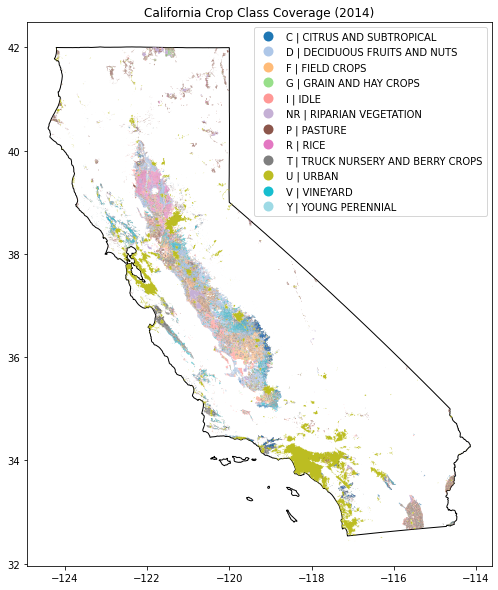

In [8]:
#create 2014 data map
base = CA.plot(color='white', edgecolor='black',figsize=(20, 10))
plot_2014_crop_class = data_2014.plot(ax = base, column = 'DWR_Standa', legend = 'true', cmap = 'tab20')
plot_2014_crop_class.set_title('California Crop Class Coverage (2014)')

Text(0.5, 1.0, 'California Crop Class Coverage (2016)')

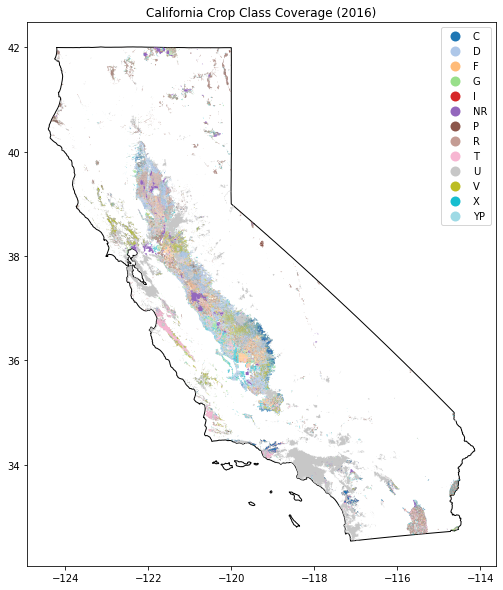

In [9]:
#create 2016 data map
base = CA.plot(color='white', edgecolor='black',figsize=(20, 10))
plot_2016_crop_class = data_2016.plot(ax = base, column = 'Symb_class', legend = True, cmap = 'tab20')
plot_2016_crop_class.set_title('California Crop Class Coverage (2016)')

Text(0.5, 1.0, 'California Crop Class Coverage (2018)')

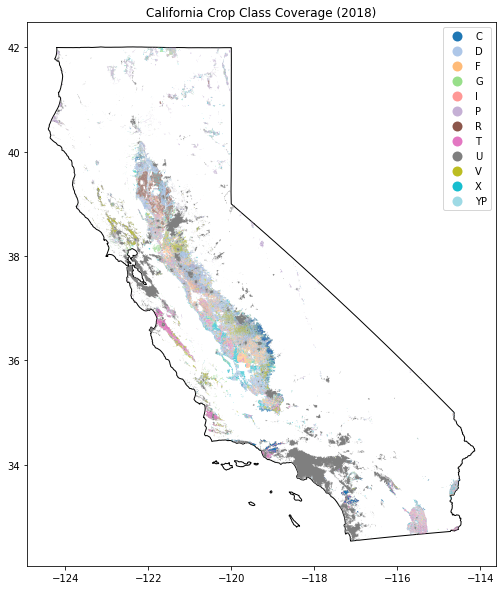

In [10]:
#create 2018 data map
base = CA.plot(color='white', edgecolor='black',figsize=(20, 10))
plot_2018_crop_class = data_2018.plot(ax = base, column = 'SYMB_CLASS', legend = 'true', cmap = 'tab20')
plot_2018_crop_class.set_title('California Crop Class Coverage (2018)')

 <a class="anchor" id="cleaning"></a>
## Data Cleaning

In [11]:
#Rename columns to meaningful names so all data have the same value names
data_2014 = data_2014[data_2014.DWR_Standa != "NR | RIPARIAN VEGETATION"]
data_2014["DWR_Standa"] = data_2014["DWR_Standa"].replace(['R | RICE'],'Rice')
data_2014["DWR_Standa"] = data_2014["DWR_Standa"].replace(['G | GRAIN AND HAY CROPS'],'Grain and hay crops')
data_2014["DWR_Standa"] = data_2014["DWR_Standa"].replace(['F | FIELD CROPS'],'Field crops')
data_2014["DWR_Standa"] = data_2014["DWR_Standa"].replace(['P | PASTURE'],'Pasture')
data_2014["DWR_Standa"] = data_2014["DWR_Standa"].replace(['T | TRUCK NURSERY AND BERRY CROPS'],'Truck, nursery, and berry crops')
data_2014["DWR_Standa"] = data_2014["DWR_Standa"].replace(['D | DECIDUOUS FRUITS AND NUTS'],'Deciduous fruits and nuts')
data_2014["DWR_Standa"] = data_2014["DWR_Standa"].replace(['C | CITRUS AND SUBTROPICAL'],'Citrus and subtropical')
data_2014["DWR_Standa"] = data_2014["DWR_Standa"].replace(['V | VINEYARD'],'Vineyard')
data_2014["DWR_Standa"] = data_2014["DWR_Standa"].replace(['I | IDLE'],'Idle')
data_2014["DWR_Standa"] = data_2014["DWR_Standa"].replace(['Y | YOUNG PERENNIAL'],'Young Perennial')
data_2014["DWR_Standa"] = data_2014["DWR_Standa"].replace(['U | URBAN'],'Urban')

data_2016 = data_2016[data_2016.Symb_class != "NR"]
data_2016 = data_2016[data_2016.Symb_class != "X"]
data_2016["Symb_class"] = data_2016["Symb_class"].replace(['R'],'Rice')
data_2016["Symb_class"] = data_2016["Symb_class"].replace(['G'],'Grain and hay crops')
data_2016["Symb_class"] = data_2016["Symb_class"].replace(['F'],'Field crops')
data_2016["Symb_class"] = data_2016["Symb_class"].replace(['P'],'Pasture')
data_2016["Symb_class"] = data_2016["Symb_class"].replace(['T'],'Truck, nursery, and berry crops')
data_2016["Symb_class"] = data_2016["Symb_class"].replace(['D'],'Deciduous fruits and nuts')
data_2016["Symb_class"] = data_2016["Symb_class"].replace(['C'],'Citrus and subtropical')
data_2016["Symb_class"] = data_2016["Symb_class"].replace(['V'],'Vineyard')
data_2016["Symb_class"] = data_2016["Symb_class"].replace(['I'],'Idle')
data_2016["Symb_class"] = data_2016["Symb_class"].replace(['YP'],'Young Perennial')
data_2016["Symb_class"] = data_2016["Symb_class"].replace(['U'],'Urban')

data_2018 = data_2018[data_2018.SYMB_CLASS != "X"]
data_2018["SYMB_CLASS"] = data_2018["SYMB_CLASS"].replace(['R'],'Rice')
data_2018["SYMB_CLASS"] = data_2018["SYMB_CLASS"].replace(['G'],'Grain and hay crops')
data_2018["SYMB_CLASS"] = data_2018["SYMB_CLASS"].replace(['F'],'Field crops')
data_2018["SYMB_CLASS"] = data_2018["SYMB_CLASS"].replace(['P'],'Pasture')
data_2018["SYMB_CLASS"] = data_2018["SYMB_CLASS"].replace(['T'],'Truck, nursery, and berry crops')
data_2018["SYMB_CLASS"] = data_2018["SYMB_CLASS"].replace(['D'],'Deciduous fruits and nuts')
data_2018["SYMB_CLASS"] = data_2018["SYMB_CLASS"].replace(['C'],'Citrus and subtropical')
data_2018["SYMB_CLASS"] = data_2018["SYMB_CLASS"].replace(['V'],'Vineyard')
data_2018["SYMB_CLASS"] = data_2018["SYMB_CLASS"].replace(['I'],'Idle')
data_2018["SYMB_CLASS"] = data_2018["SYMB_CLASS"].replace(['YP'],'Young Perennial')
data_2018["SYMB_CLASS"] = data_2018["SYMB_CLASS"].replace(['U'],'Urban')

/data/cigi/cybergisx-easybuild/conda/python3-0.9.0/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/data/cigi/cybergisx-easybuild/conda/python3-0.9.0/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


 <a class="anchor" id="final"></a>
## Final Visualization

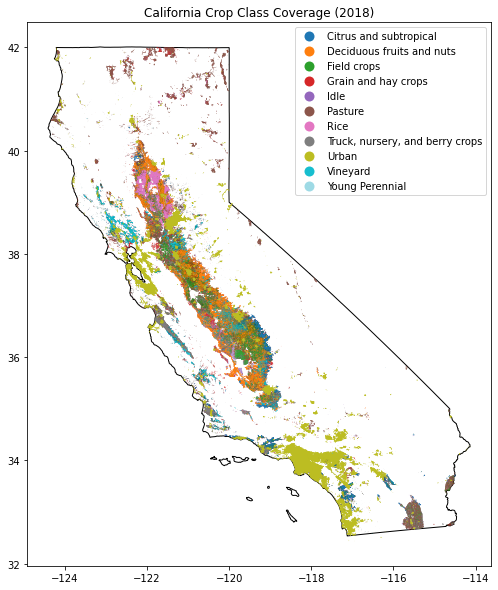

In [12]:
# Create meaningful spatial-temporal model
base = CA.plot(color='white', edgecolor='black',figsize=(20, 10))
map_2014 = data_2014.plot(ax = base, column = 'DWR_Standa', legend = 'true', cmap = 'tab20')
map_2014.set_title('California Crop Class Coverage (2014)')
plt.savefig('map_2014.png')

map_2016 = data_2016.plot(ax = base, column = 'Symb_class', legend = True, cmap = 'tab20')
map_2016.set_title('California Crop Class Coverage (2016)')
plt.savefig('map_2016.png')

map_2018 = data_2018.plot(ax = base, column = 'SYMB_CLASS', legend = 'true', cmap = 'tab20')
map_2018.set_title('California Crop Class Coverage (2018)')
plt.savefig('map_2018.png')

images = []
filenames = ['map_2014.png', 'map_2016.png', 'map_2018.png']
for filename in filenames:
    images.append(imageio.imread(filename))

In [13]:
#save gif model
imageio.mimsave('ca_crop_cover_tab20.gif', images, format='GIF', duration=1)

![SegmentLocal](ca_crop_cover_tab20.gif "segment")

 <a class="anchor" id="analysis"></a>
## Crop Analysis

In [14]:
#spatial join 2014 and 2018 based on geometry
merged_data = gpd.sjoin(data_2014, data_2018, predicate = 'contains')
print(len(merged_data))
merged_data.head(3)

199754


,Crop2014,Acres,County,Comments,Source,Modified_B,Date_Data_,Last_Modif,DWR_Standa,geometry,...,CROPTYP3,ADOY3,CROPTYP4,ADOY4,REGION,ACRES,COUNTY,LIQ_REPORT,Shape_STAr,Shape_STLe
1,Peaches/Nectarines,3.354826,Tulare,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,Deciduous fruits and nuts,"POLYGON ((-119.44511 36.54089, -119.44511 36.5...",...,****,0.0,****,0.0,SCRO,3.35483,Tulare,D5 **** **** ****,21073.707288,866.351259
3,Grapes,43.474109,Fresno,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,Vineyard,"POLYGON ((-119.97019 36.77553, -119.97018 36.7...",...,****,0.0,****,0.0,SCRO,43.47411,Fresno,V **** **** ****,274749.750896,2256.858669
5,Grapes,0.562252,Santa Cruz,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,Vineyard,"POLYGON ((-121.93200 37.07960, -121.93259 37.0...",...,****,0.0,****,0.0,SCRO,0.56225,Santa Cruz,V **** **** ****,3581.472622,307.077585


In [15]:
#change index for merged_data
merged_data.index = range(len(merged_data))

In [16]:
#Count instances of a different classes of crops being cultivated for the same geometry from 2014 to 2018
count = 0
class_2014 = []
class_2018 = []

for i in range(len(merged_data)):
        if merged_data.DWR_Standa[i] != merged_data.SYMB_CLASS[i]:
            count += 1
            class_2014.append(merged_data.DWR_Standa[i])
            class_2018.append(merged_data.SYMB_CLASS[i])
        else:
            continue

In [17]:
print("The total change of crop cover is:", count)
print("The proportion of crop cover change is:", count/len(merged_data))

The total change of crop cover is: 34721
The proportion of crop cover change is: 0.17381879712045817


<b> 17.4% of the land cover changed in California from 2014 to 2018. </b>

In [18]:
#find crop classes that decreased the most from 2014 to 2018
decrease = {}  
for i in class_2014: 
    if i in decrease:
        decrease[i] += 1
    else:
        decrease[i] = 1 

#Create sorted list
decrease_sorted = sorted(decrease.items(), key=itemgetter(1), reverse = True)
decrease_sorted

[('Idle', 10450),
 ('Pasture', 6266),
 ('Field crops', 4510),
 ('Truck, nursery, and berry crops', 3257),
 ('Grain and hay crops', 2132),
 ('Deciduous fruits and nuts', 2096),
 ('Vineyard', 1714),
 ('Urban', 1566),
 ('Young Perennial', 1403),
 ('Citrus and subtropical', 1119),
 ('Rice', 208)]

<b> The idle group decreased the most in frequency from 2014 to 2018. </b>

In [19]:
#find crop classes that increases the most from 2014 to 2018
increase = {} 
for i in class_2018: 
    if i in increase:
        increase[i] += 1 
    else:
        increase[i] = 1 

#Create sorted list
increase_sorted = sorted(increase.items(), key=itemgetter(1), reverse = True)
increase_sorted

[('Grain and hay crops', 7052),
 ('Pasture', 5843),
 ('Field crops', 5336),
 ('Truck, nursery, and berry crops', 5158),
 ('Deciduous fruits and nuts', 4233),
 ('Citrus and subtropical', 2222),
 ('Young Perennial', 2102),
 ('Vineyard', 1750),
 ('Rice', 1022),
 ('Urban', 3)]

<b> The grain and hay crops group increased the most in frequency from 2014 to 2018. </b>

In [20]:
#find net change in crop classes from 2014 to 2018
net = {}
for x in increase.keys():
    net[x] = increase[x] - decrease[x]
net['Idle'] = 0 - decrease['Idle']

#Create sorted list
net_sorted = sorted(net.items(), key=itemgetter(1), reverse = True)
print(net_sorted)

[('Grain and hay crops', 4920), ('Deciduous fruits and nuts', 2137), ('Truck, nursery, and berry crops', 1901), ('Citrus and subtropical', 1103), ('Field crops', 826), ('Rice', 814), ('Young Perennial', 699), ('Vineyard', 36), ('Pasture', -423), ('Urban', -1563), ('Idle', -10450)]
